# INSTALL ANACONDA

To install Anaconda, download the installer [here](https://www.anaconda.com/products/individual)  and follow the instructions.

# CREATE CONDA ENVIRONEMENT

Open a terminal, and type
```bash
conda create -n env_name python=3.9
```

In order to use this environment, you should activate it using
```bash
conda activate env_name
```
After activating, the environment name should appear on the left in the prompt line.

# INSTALL PYTHON PACKAGES (LIBRAIRIES) FOR SCIENTIFIC COMPUTING

Use ```conda install -n env_name``` to install packages to your conda environment. Below is a list of popular packages for scientific computing.

- [NumPy](https://numpy.org/) Scientific computing using arrays. Uses methods written in C and Fortran
- [Scikit-learn](https://scikit-learn.org/) tools for machine learning. Uses NumPy arrays
- [Matplotlib](https://matplotlib.org/) librairies for visualization

To install these packages, type:

```bash
conda install -n env_name numpy scikit-learn matplotlib -y
```

# Example 1: 1-D Kernel Density Estimation using scikit-learn

### 1. Create Dataset

Function used:
- [numpy.random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html): random samples from a normal ditribution
- [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html): plot histogram with matplotlib

In [74]:
# import numpy pacakge with alias 'np'
import numpy as np

# set seed for reproducibility
np.random.seed(0)

# 1000 data points from
# bimodal distribution (sum of two Gaussians)
n = 1000
mean1 = 0
mean2 = 5
sd1 = 1
sd2 = 2

samples1 = np.random.normal(mean1, sd1, int(0.3*n))
samples2 = np.random.normal(mean2, sd2, int(0.7*n))
samples = np.concatenate((samples1, samples2))

# reshape array to a n x 1 matrix,
# required for input to scikit-learn estimator
samples = samples.reshape(n, 1)


# display the first 10 elements of array 'samples'
print(samples[:10])

[[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]]


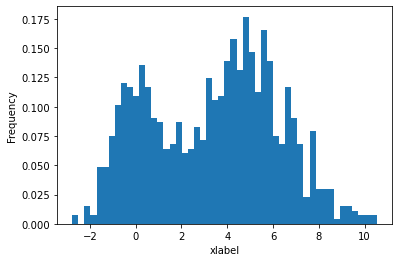

In [75]:
# import matplotlib.pyplot, the plotting module of matplotlib
# with alias 'plt'
import matplotlib.pyplot as plt

plt.hist(samples, bins=50, density=True)
plt.xlabel('xlabel')
plt.ylabel('Frequency')
plt.show()

### 2. Kernel Density Estimation

Functions/Class used:
- [sklearn.neighbors.KernelDensity](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity): kernel density estimator from scikit-learn
- [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html): evenly sample an interval

In [78]:
# import function KernelDensity using a from ... import ... clause
from sklearn.neighbors import KernelDensity

# estimator (model)
kde = KernelDensity(kernel='gaussian', bandwidth=.5)

# fit the estimator to data 'samples'
kde.fit(samples)

# use the trained estimator to predict values of the PDF for data points 'xs'
xs = np.linspace(samples.min(), samples.max(), 1000).reshape(1000, 1)
log_dens = kde.score_samples(xs)

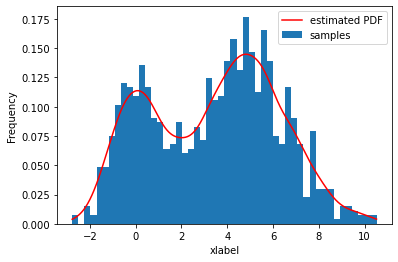

In [79]:
# plot estimated PDF on top of histogram
plt.hist(samples, bins=50, density=True, label='samples')
plt.plot(xs, np.exp(log_dens), '-r', label='estimated PDF')
plt.xlabel('xlabel')
plt.ylabel('Frequency')
plt.legend()
plt.show()